In [ ]:
# Loading the packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # chain the different layers together
from tensorflow.keras.layers import Dense # generate the fully-connected dense layer

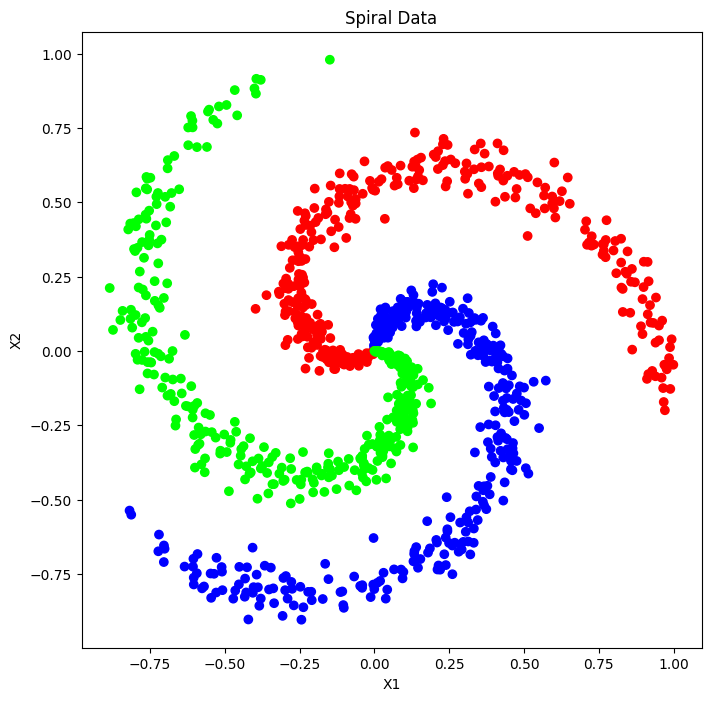

In [4]:
# Function to generate spiral data
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        ix = range(n_points * class_number, n_points * (class_number +1))
        r = np.linspace(0.0, 1, n_points) # radius
        t = np.linspace(class_number*4, (class_number + 1) * 4, n_points)+ np.random.randn(n_points) * 0.2
        X.extend(np.c_[r * np.sin(t), r*np.cos(t)])
        y.extend([class_number] * n_points)
    return np.array(X), np.array(y)

# Genarate Spiral Data
X, y = generate_spiral_data(333, 3) # 999 points, 3 classes

# Plot the spiral data
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='brg')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()




In [5]:
X

array([[-0.00000000e+00,  0.00000000e+00],
       [ 6.68319278e-04,  2.93696845e-03],
       [-7.60225798e-04,  5.97593457e-03],
       ...,
       [-4.66783324e-01,  8.77554229e-01],
       [-3.94703399e-01,  9.15529466e-01],
       [-6.12876250e-01,  7.90178905e-01]])

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Split the data into training data and testing data
# If test_size - very large means more error possibility and if test_size is very small it likely be over-fitting
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scalar
scalar = StandardScaler()

# Fit the scalar on the training data
scalar.fit(X_train)

# Transform the training and test data
scalar.fit(X_train)

# Transform the training and test data
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
